# **Neural Network**

### MACHINE INTELLIGENCE IN ARCHITECTURE SYLLABUS

#### LECTURES/WORKSHOPS
*Monday 12th July - Friday 23rd July 2021 08:00 to 13:00 CST*

#### TEACHING STAFF
*Dr. Jose Luis García del Castillo y López\
jgarciadelcasti@gsd.harvard.edu \
Lecturer in Architectural Technology\
Lecturer in Architecture\
Harvard GSD*

*Runjia Tian\
runjia_tian@gsd.harvard.edu\
Machine Learning Researcher\
Harvard GSD*

In [1]:
import torch

print("PyTorch", torch.__version__)

PyTorch 1.8.0


In [2]:
torch.cuda.is_available()

True

#### Create your own Photoshop

In [8]:
from IPython.display import IFrame
from torch import nn, tensor
import numpy as np
import matplotlib.pyplot as plt

Shape of original imge(1050, 700, 3), shape of cropped image(70, 50, 3)


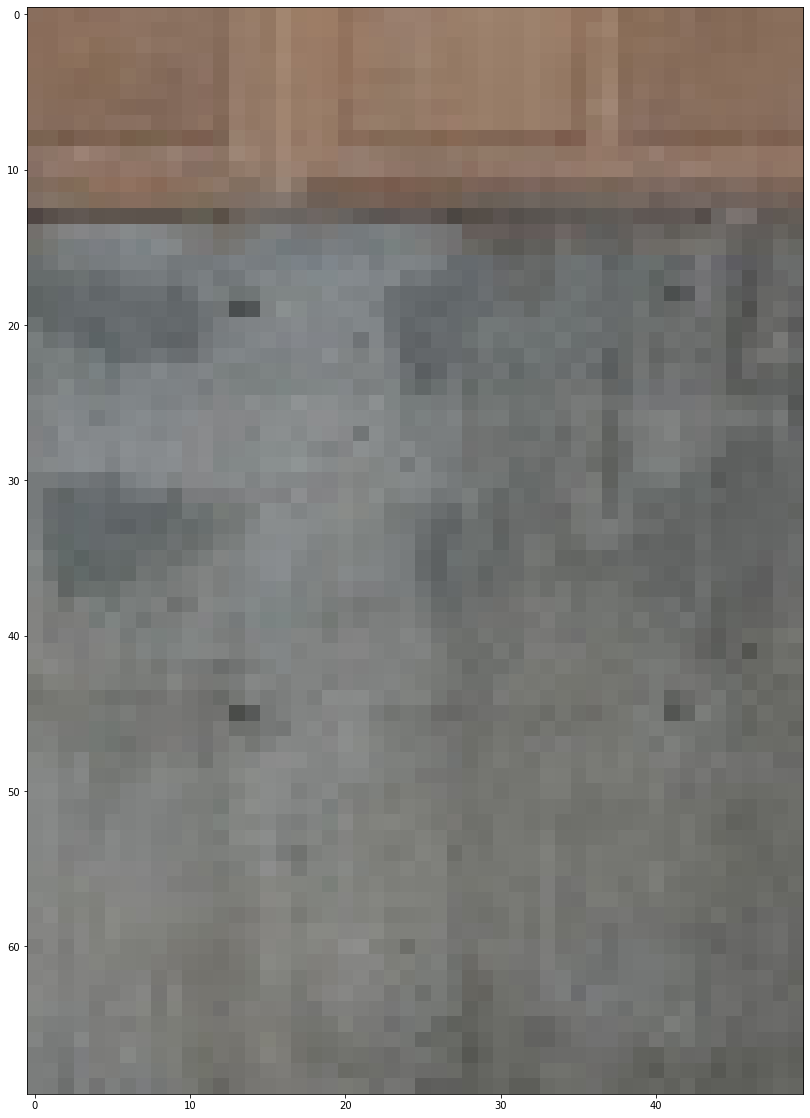

In [232]:
img = plt.imread('asset/exter_library.jpg')

partial = (img[200:270,300:350,:])

print(f"Shape of original imge{img.shape}, shape of cropped image{partial.shape}")
partial.shape

plt.figure(figsize = (20,20))
plt.imshow(partial);

#### Convolution

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


array([[[11.125,  2.   , 24.125],
        [30.125,  2.   , 24.125],
        [20.5  , 25.125, 16.5  ],
        ...,
        [24.125, 24.125,  9.125],
        [ 8.125,  0.   , 16.5  ],
        [16.5  , 16.5  ,  9.125]],

       [[20.5  , 11.125,  0.   ],
        [30.125,  2.   , 24.125],
        [11.125,  0.   ,  2.   ],
        ...,
        [ 8.125,  0.   , 16.5  ],
        [25.125, 24.125, 16.5  ],
        [16.5  , 16.5  ,  9.125]],

       [[28.5  , 30.125, 16.5  ],
        [18.125, 20.5  ,  8.125],
        [20.5  ,  8.125,  9.125],
        ...,
        [ 8.125,  0.   , 16.5  ],
        [16.5  , 16.5  ,  9.125],
        [16.5  , 16.5  ,  9.125]],

       ...,

       [[ 0.   , 12.5  , 30.125],
        [29.125,  6.125, 28.5  ],
        [ 7.125,  3.125, 18.   ],
        ...,
        [ 0.   , 12.5  , 30.125],
        [18.   , 18.   , 11.125],
        [ 5.125, 15.125, 20.5  ]],

       [[ 0.   , 12.5  , 25.125],
        [18.   ,  4.5  , 18.125],
        [ 7.125,  0.5  , 18.   ],
        .

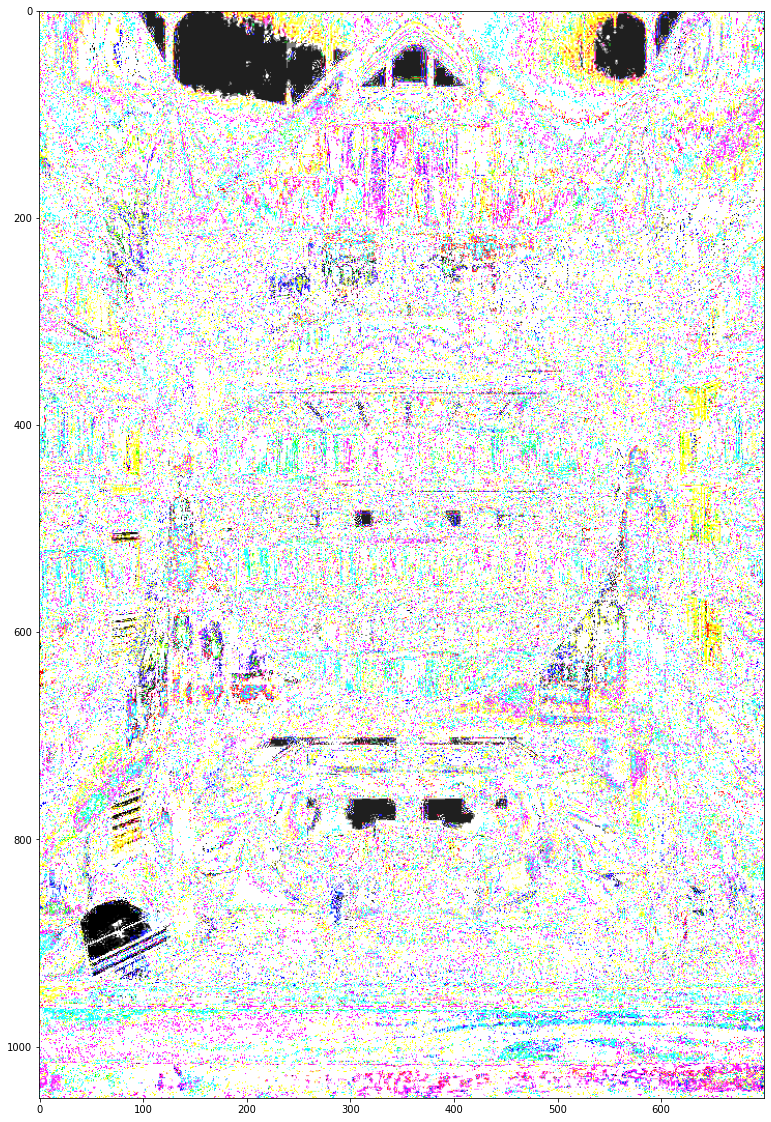

In [10]:
manipulated = (img)*img/8

plt.figure(figsize = (20,20))
plt.imshow(manipulated);
manipulated

get the rgb channels

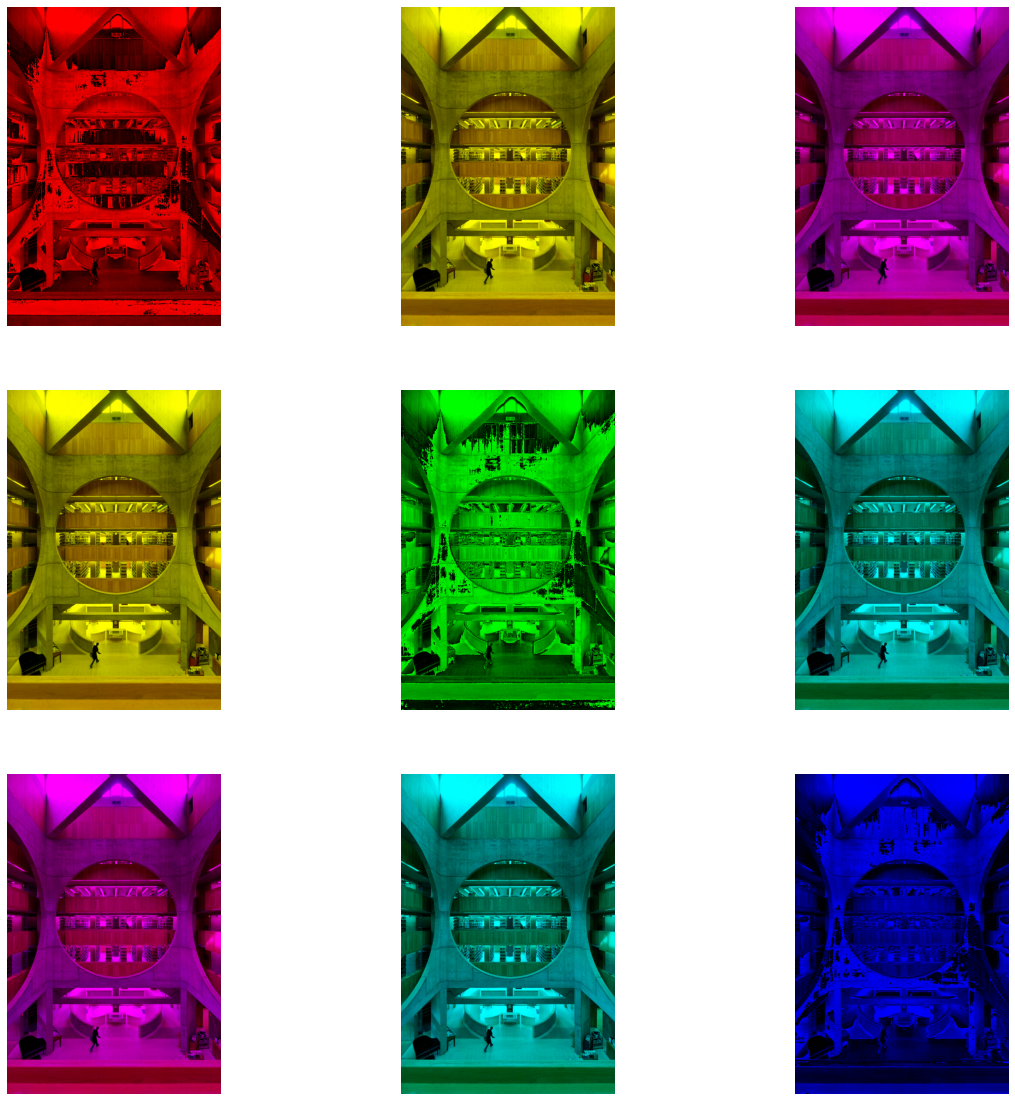

In [12]:
fig, axs = plt.subplots(3, 3, figsize = (20,20))

for i in range(0,3):
    channel = np.zeros(img.shape, dtype='uint8')
    channel[:,:,i] = img[:,:,i]
    for j in range(0,3):
        empty = np.zeros(img.shape, dtype='uint8')
        empty[:,:,j] = img[:,:,j]
        axs[i][j].axis('off')
        axs[i][j].imshow(channel+empty);
        channel.shape

In [13]:
IFrame("https://giphy.com/embed/i4NjAwytgIRDW", 300,300)

#### Photoshop Image Filters?

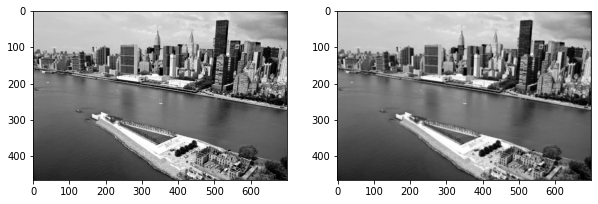

In [248]:
import torch.nn.functional as F
import torchvision
import numpy as np
from torch.autograd import Variable

blur_kernel = [[[0.0625,0.125,0.0625],
          [0.125,0.25,0.125],
          [0.0625,0.125,0.0625]]]

img = plt.imread('asset/Roosevelt_Park.jpg')

def apply_single_filter(img, kernel):

    kernel = torch.FloatTensor(kernel).unsqueeze(0)
    #print(kernel.shape)
    img_tensor = torchvision.transforms.functional.to_tensor(img).reshape(3,img.shape[0], img.shape[1])
    channel_r = channel_g = channel_b = torch.zeros(img.shape[0], img.shape[1])
    channel_r = img_tensor[0,:,:].unsqueeze(0).unsqueeze(0)

    r_out = F.conv2d(channel_r, kernel, stride=1, padding = 1).squeeze(0)
    final_out_r = r_out.reshape(r_out.shape[1],r_out.shape[2],1).squeeze(0).squeeze(0)

    
    fig, axs = plt.subplots(1, 2, figsize = (10,20))
    axs[0].imshow(channel_r.squeeze(0).squeeze(0), cmap='gray');
    axs[1].imshow(final_out_r, cmap='gray');
    
apply_single_filter(img, blur_kernel)

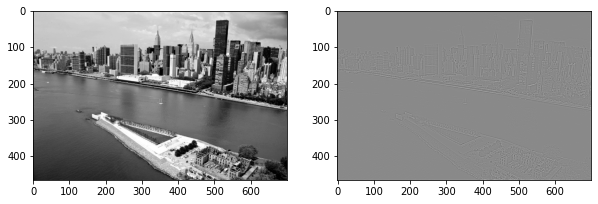

In [249]:
outline_filter = [[[-1,-1,-1],
                 [-1,8,-1],
                 [-1,-1,-1]]]

apply_single_filter(img, outline_filter)

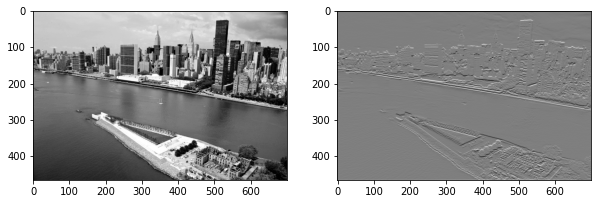

In [250]:
top_sobel_filter = [[[1,2,1],
                 [0,0,0],
                 [-1,-2,-1]]]

apply_single_filter(img, top_sobel_filter)

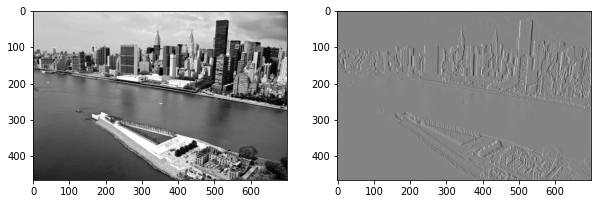

In [251]:
left_sobel_filter = [[[1,0,-1],
                 [2,0,-2],
                 [1,0,-1]]]

apply_single_filter(img, left_sobel_filter)

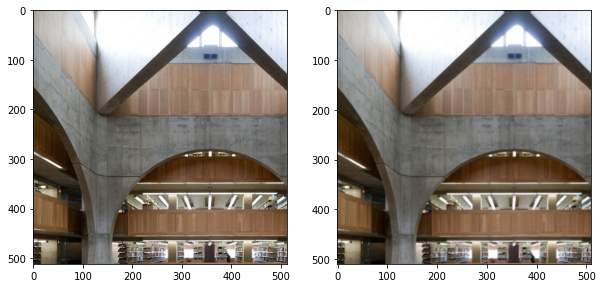

In [198]:
def apply_filter(image, kernel = blur_kernel,channels=3, padding=0, iteration = 1):
    kernel = torch.FloatTensor(kernel)

    x = Variable(torch.from_numpy(img.astype(np.float32))).permute(2, 0, 1)
    kernel = torch.FloatTensor(kernel).unsqueeze(0).unsqueeze(0)
    kernel = np.repeat(kernel, channels, axis=0)
    weight = nn.Parameter(data=kernel, requires_grad=False)
    out_x = F.conv2d(x.unsqueeze(0),weight,padding=padding, groups = channels)
    out_x = out_x.squeeze(0).permute(1, 2, 0).data.numpy().astype(np.uint8)
    
    return out_x

blurred = apply_filter(apply_filter(apply_filter(img)))
fig, axs = plt.subplots(1, 2, figsize = (10,20))
axs[0].imshow(img);
axs[1].imshow(blurred);

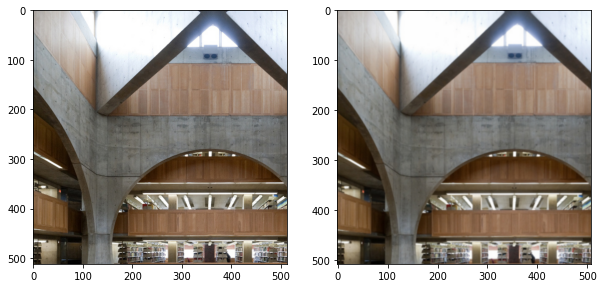

In [215]:
gaussian_kernel = [[0.00078633, 0.00655965, 0.01330373, 0.00655965, 0.00078633],
                  [0.00655965, 0.05472157, 0.11098164, 0.05472157, 0.00655965],
                  [0.01330373, 0.11098164, 0.22508352, 0.11098164, 0.01330373],
                  [0.00655965, 0.05472157, 0.11098164, 0.05472157, 0.00655965],
                  [0.00078633, 0.00655965, 0.01330373, 0.00655965, 0.00078633]]

blurred = apply_filter(img,gaussian_kernel)
fig, axs = plt.subplots(1, 2, figsize = (10,20))
axs[0].imshow(img);
axs[1].imshow(blurred);

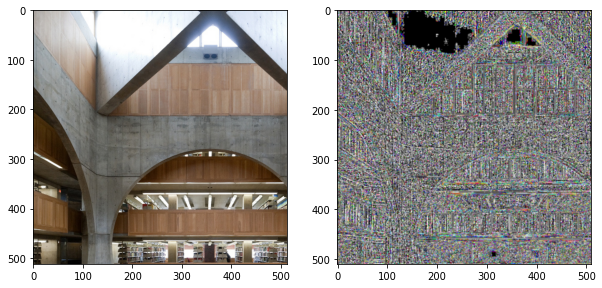

In [223]:
outline_filter = [[-1,-1,-1],
                 [-1,8,-1],
                 [-1,-1,-1]]

outline = apply_filter(img,outline_filter)
fig, axs = plt.subplots(1, 2, figsize = (10,20))
axs[0].imshow(img);
axs[1].imshow(outline, interpolation="quadric");

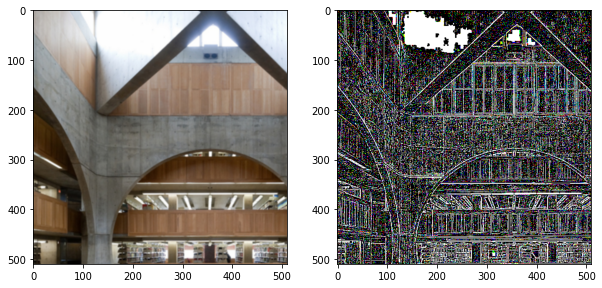

In [228]:
identity_filter = [[1/9,1/9,1/9],
                 [1/9,1/9,1/9],
                 [1/9,1/9,1/9]]

identity = apply_filter(img,identity_filter)
blurred = apply_filter(img)
fig, axs = plt.subplots(1, 2, figsize = (10,20))
axs[0].imshow(identity);
axs[1].imshow(identity - blurred);

#### Build A CPPN

In [14]:
model = nn.Sequential(
    nn.Linear(5,32),
    nn.Tanh(),
    nn.Linear(32,32),
    nn.Tanh(),
    nn.Linear(32,32),
    nn.Tanh(),
    nn.Linear(32,1),
    nn.Sigmoid(),
)

w = torch.empty(5, requires_grad=False)
nn.init.normal_(w)
w

model(w)

tensor([0.5138], grad_fn=<SigmoidBackward>)

In [254]:
def pixelGrid(resolution=64):
    x = np.linspace(-1,1, resolution)
    X,Y = np.meshgrid(x,x)
    return np.vstack([X.flatten(),Y.flatten()]).T

# example
print(pixelGrid(3))

def generateIm(model,z=[0,0],resolution=64, scale=1.0):
    model.eval()
    pixels = pixelGrid(resolution)*scale
    input = tensor(np.hstack([pixels,np.linalg.norm(pixels,axis=1).reshape(-1,1),np.repeat([z],resolution**2, axis=0)*scale]))
    print(input.shape)
    return model(input.float()).reshape(resolution,resolution).detach().numpy()

[[-1. -1.]
 [ 0. -1.]
 [ 1. -1.]
 [-1.  0.]
 [ 0.  0.]
 [ 1.  0.]
 [-1.  1.]
 [ 0.  1.]
 [ 1.  1.]]


torch.Size([40000, 5])
(200, 200)


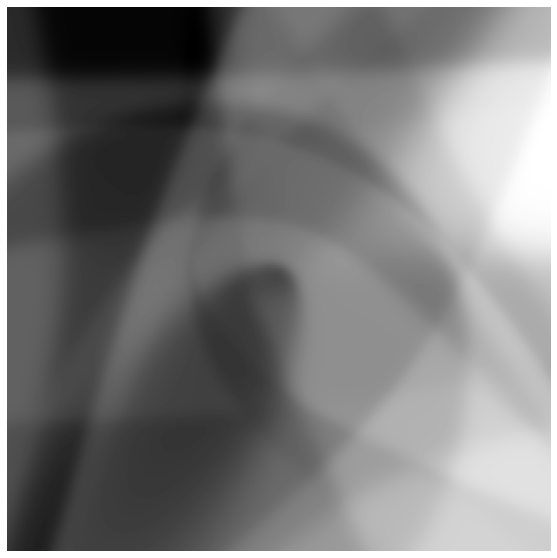

In [264]:
%matplotlib inline

#Latent Vector { run: "auto" }
z1 = 0.65
z2 = 0.56
scale = 60

im = generateIm(model,z=[z1,z2],scale=scale,resolution=200)
print(im.shape)

plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(im, cmap = "gray")


##### Style Transfer

We use the implementation of style transfer from PyTorch: https://pytorch.org/tutorials/advanced/neural_style_tutorial.html

In [17]:
from __future__ import print_function

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from PIL import Image
import matplotlib.pyplot as plt

import torchvision.transforms as transforms
import torchvision.models as models

import copy

In [29]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# desired size of the output image
imsize = 512 if torch.cuda.is_available() else 128  # use small size if no gpu

loader = transforms.Compose([
    transforms.Resize(imsize),  # scale imported image
    transforms.ToTensor()])  # transform it into a torch tensor


def image_loader(image_name):
    image = Image.open(image_name)
    # fake batch dimension required to fit network's input dimensions
    image = loader(image).unsqueeze(0)[:,:,0:512,0:512]
    print(image.size())
    return image.to(device, torch.float)


style_img = image_loader("asset/composition_vii.jpg")
content_img = image_loader("asset/Roosevelt Park.jpg")

assert style_img.size() == content_img.size(), \
    "we need to import style and content images of the same size"

torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 512])


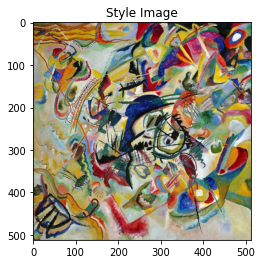

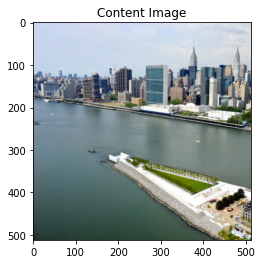

In [30]:
unloader = transforms.ToPILImage()  # reconvert into PIL image

plt.ion()

def imshow(tensor, title=None):
    image = tensor.cpu().clone()  # we clone the tensor to not do changes on it
    image = image.squeeze(0)      # remove the fake batch dimension
    image = unloader(image)
    plt.imshow(image)
    if title is not None:
        plt.title(title)
    plt.pause(0.001) # pause a bit so that plots are updated


plt.figure()
imshow(style_img, title='Style Image')

plt.figure()
imshow(content_img, title='Content Image')

In [31]:
class ContentLoss(nn.Module):

    def __init__(self, target,):
        super(ContentLoss, self).__init__()
        # we 'detach' the target content from the tree used
        # to dynamically compute the gradient: this is a stated value,
        # not a variable. Otherwise the forward method of the criterion
        # will throw an error.
        self.target = target.detach()

    def forward(self, input):
        self.loss = F.mse_loss(input, self.target)
        return input

In [32]:
def gram_matrix(input):
    a, b, c, d = input.size()  # a=batch size(=1)
    # b=number of feature maps
    # (c,d)=dimensions of a f. map (N=c*d)

    features = input.view(a * b, c * d)  # resise F_XL into \hat F_XL

    G = torch.mm(features, features.t())  # compute the gram product

    # we 'normalize' the values of the gram matrix
    # by dividing by the number of element in each feature maps.
    return G.div(a * b * c * d)

In [33]:
class StyleLoss(nn.Module):

    def __init__(self, target_feature):
        super(StyleLoss, self).__init__()
        self.target = gram_matrix(target_feature).detach()

    def forward(self, input):
        G = gram_matrix(input)
        self.loss = F.mse_loss(G, self.target)
        return input

In [ ]:
cnn = models.vgg19(pretrained=True).features.to(device).eval()

In [35]:
cnn_normalization_mean = torch.tensor([0.485, 0.456, 0.406]).to(device)
cnn_normalization_std = torch.tensor([0.229, 0.224, 0.225]).to(device)

# create a module to normalize input image so we can easily put it in a
# nn.Sequential
class Normalization(nn.Module):
    def __init__(self, mean, std):
        super(Normalization, self).__init__()
        # .view the mean and std to make them [C x 1 x 1] so that they can
        # directly work with image Tensor of shape [B x C x H x W].
        # B is batch size. C is number of channels. H is height and W is width.
        self.mean = torch.tensor(mean).view(-1, 1, 1)
        self.std = torch.tensor(std).view(-1, 1, 1)

    def forward(self, img):
        # normalize img
        return (img - self.mean) / self.std

In [36]:
# desired depth layers to compute style/content losses :
content_layers_default = ['conv_4']
style_layers_default = ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']

def get_style_model_and_losses(cnn, normalization_mean, normalization_std,
                               style_img, content_img,
                               content_layers=content_layers_default,
                               style_layers=style_layers_default):
    cnn = copy.deepcopy(cnn)

    # normalization module
    normalization = Normalization(normalization_mean, normalization_std).to(device)

    # just in order to have an iterable access to or list of content/syle
    # losses
    content_losses = []
    style_losses = []

    # assuming that cnn is a nn.Sequential, so we make a new nn.Sequential
    # to put in modules that are supposed to be activated sequentially
    model = nn.Sequential(normalization)

    i = 0  # increment every time we see a conv
    for layer in cnn.children():
        if isinstance(layer, nn.Conv2d):
            i += 1
            name = 'conv_{}'.format(i)
        elif isinstance(layer, nn.ReLU):
            name = 'relu_{}'.format(i)
            # The in-place version doesn't play very nicely with the ContentLoss
            # and StyleLoss we insert below. So we replace with out-of-place
            # ones here.
            layer = nn.ReLU(inplace=False)
        elif isinstance(layer, nn.MaxPool2d):
            name = 'pool_{}'.format(i)
        elif isinstance(layer, nn.BatchNorm2d):
            name = 'bn_{}'.format(i)
        else:
            raise RuntimeError('Unrecognized layer: {}'.format(layer.__class__.__name__))

        model.add_module(name, layer)

        if name in content_layers:
            # add content loss:
            target = model(content_img).detach()
            content_loss = ContentLoss(target)
            model.add_module("content_loss_{}".format(i), content_loss)
            content_losses.append(content_loss)

        if name in style_layers:
            # add style loss:
            target_feature = model(style_img).detach()
            style_loss = StyleLoss(target_feature)
            model.add_module("style_loss_{}".format(i), style_loss)
            style_losses.append(style_loss)

    # now we trim off the layers after the last content and style losses
    for i in range(len(model) - 1, -1, -1):
        if isinstance(model[i], ContentLoss) or isinstance(model[i], StyleLoss):
            break

    model = model[:(i + 1)]

    return model, style_losses, content_losses

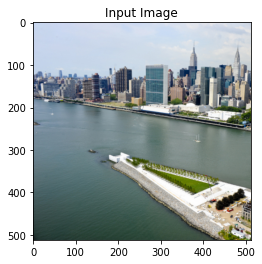

In [37]:
input_img = content_img.clone()
# if you want to use white noise instead uncomment the below line:
# input_img = torch.randn(content_img.data.size(), device=device)

# add the original input image to the figure:
plt.figure()
imshow(input_img, title='Input Image')

In [39]:
def get_input_optimizer(input_img):
    # this line to show that input is a parameter that requires a gradient
    optimizer = optim.LBFGS([input_img.requires_grad_()])
    return optimizer

def run_style_transfer(cnn, normalization_mean, normalization_std,
                       content_img, style_img, input_img, num_steps=300,
                       style_weight=1000000, content_weight=1):
    """Run the style transfer."""
    print('Building the style transfer model..')
    model, style_losses, content_losses = get_style_model_and_losses(cnn,
        normalization_mean, normalization_std, style_img, content_img)
    optimizer = get_input_optimizer(input_img)

    print('Optimizing..')
    run = [0]
    while run[0] <= num_steps:

        def closure():
            # correct the values of updated input image
            input_img.data.clamp_(0, 1)

            optimizer.zero_grad()
            model(input_img)
            style_score = 0
            content_score = 0

            for sl in style_losses:
                style_score += sl.loss
            for cl in content_losses:
                content_score += cl.loss

            style_score *= style_weight
            content_score *= content_weight

            loss = style_score + content_score
            loss.backward()

            run[0] += 1
            if run[0] % 50 == 0:
                print("run {}:".format(run))
                print('Style Loss : {:4f} Content Loss: {:4f}'.format(
                    style_score.item(), content_score.item()))
                print()

            return style_score + content_score

        optimizer.step(closure)

    # a last correction...
    input_img.data.clamp_(0, 1)

    return input_img

Building the style transfer model..
Optimizing..


c:\users\archolic\anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if sys.path[0] == '':
c:\users\archolic\anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  del sys.path[0]


run [50]:
Style Loss : 2.046055 Content Loss: 22.231133

run [100]:
Style Loss : 1.921981 Content Loss: 21.613802

run [150]:
Style Loss : 2.015814 Content Loss: 21.122097

run [200]:
Style Loss : 1.704038 Content Loss: 21.116356

run [250]:
Style Loss : 1.429556 Content Loss: 20.570793

run [300]:
Style Loss : 39844216.000000 Content Loss: 598.389038



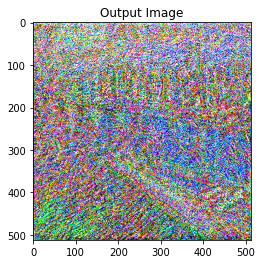

In [46]:
output = run_style_transfer(cnn, cnn_normalization_mean, cnn_normalization_std,
                            content_img, style_img, input_img)

plt.figure()
imshow(output, title='Output Image')

# sphinx_gallery_thumbnail_number = 4
plt.ioff()
plt.show()

##### StyleGAN

First install styleGAN module in anaconda using the wheel. run

`pip install stylegan2_pytorch-1.8.4-py3-none-any.whl --user`

Credit: https://github.com/lucidrains/stylegan2-pytorch

Then run the following in Anaconda Command Prompt：

`
 stylegan2_pytorch  --data "C:/Users/Archolic/Downloads/ZuBuD/png-ZuBuD"  --results_dir  "Zurich/results" --models_dir  "Zurich/models" --name ZurichBuildings
`

##### Pix2Pix

https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix